# Kultasen taulun rakentelua

In [1]:
import azure.cosmos.cosmos_client as cosmos_client
import azure.cosmos.exceptions as exceptions
import os
import json
import numpy as np
from dotenv import load_dotenv
from azure.cosmos import CosmosClient, PartitionKey

load_dotenv('../../shared/.env')

# database env
URL = os.getenv('COSMOSDB_ENDPOINT')  
MASTER_KEY = os.getenv('COSMOSDB_KEY')

# init client
client = cosmos_client.CosmosClient(URL, {'masterKey': MASTER_KEY}, user_agent="", user_agent_overwrite=True)

# Create a database (if it doesn't exist)
database_name = 'MojovaDB'
database = client.get_database_client(database_name)

# Create a container (if it doesn't exist)
container_name = 'Analytics'
try:
    container = database.create_container_if_not_exists(
        id=container_name,
        partition_key=PartitionKey(path='/medallion'),
        offer_throughput=400
    )
except exceptions.CosmosResourceExistsError:
    container = database.get_container_client(container_name)

import pandas as pd
query = "SELECT * FROM c WHERE c['/medallion'] = 'silver_hopp'"
data = container.query_items(query=query, enable_cross_partition_query=True)

# data contains iterator object
data = [item for item in data]

df = pd.DataFrame(data)
df

,org_code,unit_code,quarter,1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin,2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa,3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta,4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe,5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille,6_hoitajat_kertoivat_minulle_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan,7_hoitajat_kertoivat_minulle_saamieni_laakkeiden_mahdollisista_sivuvaikutuksista,...,6_hoitajat_kertoivat_mie_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan,7_hoitajat_kertoivat_mie_saamieni_laakkeiden_mahdollisista_sivuvaikutuksista,11_hoitajat_huolehtivat_etteivat_hoito_ja_tai_tutkimukset_aiheuttaneet_mie_noloja_tai_kiusallisia_tilanteita,unnamed:_25,/medallion,_rid,_self,_etag,_attachments,_ts
0,117.0,AIKPKLVAS,2_2023,E,E,E,E,E,E,E,...,None,None,None,NaN,silver_hopp,1kAqALc91HoBAAAAAAAAAA==,dbs/1kAqAA==/colls/1kAqALc91Ho=/docs/1kAqALc91...,"""2100e27d-0000-4700-0000-673e4c540000""",attachments/,1732136020
1,117.0,AIKPKLVAS,2_2023,5,5,5,5,5,5,5,...,None,None,None,NaN,silver_hopp,1kAqALc91HoCAAAAAAAAAA==,dbs/1kAqAA==/colls/1kAqALc91Ho=/docs/1kAqALc91...,"""2100e37d-0000-4700-0000-673e4c540000""",attachments/,1732136020
2,117.0,AIKPKLVAS,2_2023,5,5,5,E,E,E,E,...,None,None,None,NaN,silver_hopp,1kAqALc91HoDAAAAAAAAAA==,dbs/1kAqAA==/colls/1kAqALc91Ho=/docs/1kAqALc91...,"""2100e47d-0000-4700-0000-673e4c540000""",attachments/,1732136020
3,117.0,AIKPKLVAS,2_2023,5,4,5,5,5,5,5,...,None,None,None,NaN,silver_hopp,1kAqALc91HoEAAAAAAAAAA==,dbs/1kAqAA==/colls/1kAqALc91Ho=/docs/1kAqALc91...,"""2100e57d-0000-4700-0000-673e4c540000""",attachments/,1732136020
4,117.0,AIKPKLVAS,2_2023,5,5,5,None,None,None,None,...,None,None,None,NaN,silver_hopp,1kAqALc91HoFAAAAAAAAAA==,dbs/1kAqAA==/colls/1kAqALc91Ho=/docs/1kAqALc91...,"""2100e67d-0000-4700-0000-673e4c540000""",attachments/,1732136020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11166,117.0,PERIOPAAM,3_2021,5,5,5,E,5,None,None,...,5,5,5,NaN,silver_hopp,1kAqALc91HqfKwAAAAAAAA==,dbs/1kAqAA==/colls/1kAqALc91Ho=/docs/1kAqALc91...,"""210092b7-0000-4700-0000-673e4e1c0000""",attachments/,1732136476
11167,117.0,PERIOPAAM,3_2021,5,5,5,5,5,None,None,...,5,5,5,NaN,silver_hopp,1kAqALc91HqgKwAAAAAAAA==,dbs/1kAqAA==/colls/1kAqALc91Ho=/docs/1kAqALc91...,"""210094b7-0000-4700-0000-673e4e1c0000""",attachments/,1732136476
11168,117.0,PERIOPAAM,3_2021,4,5,5,E,E,None,None,...,4,1,4,NaN,silver_hopp,1kAqALc91HqhKwAAAAAAAA==,dbs/1kAqAA==/colls/1kAqALc91Ho=/docs/1kAqALc91...,"""210096b7-0000-4700-0000-673e4e1c0000""",attachments/,1732136476
11169,117.0,PERIOPAAM,3_2021,5,5,5,5,5,None,None,...,5,5,5,NaN,silver_hopp,1kAqALc91HqiKwAAAAAAAA==,dbs/1kAqAA==/colls/1kAqALc91Ho=/docs/1kAqALc91...,"""210097b7-0000-4700-0000-673e4e1c0000""",attachments/,1732136476


In [2]:
df.columns

Index(['org_code', 'unit_code', 'quarter',
       '1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin',
       '2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa',
       '3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta',
       '4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe',
       '5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille',
       '6_hoitajat_kertoivat_minulle_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan',
       '7_hoitajat_kertoivat_minulle_saamieni_laakkeiden_mahdollisista_sivuvaikutuksista',
       '8_hoitajat_puhuivat_arkaluontoisista_asioista_siten_etteivat_ulkopuoliset_kuulleet_niita',
       '9_hoitajat_huolehtivat_etta_liikkuminen_oli_turvallista_hoidon_aikana',
       '10_hoitajat_kohtelivat_minua_hyvin',
       '11_hoitajat_huolehtivat_etteivat_hoito_ja_tai_tutkimukset_aiheuttaneet_minulle_noloja_tai_kiusallisia_tilanteita',
    

In [3]:
df.describe()

,org_code,sairaalatyyppiyo_=_1ks_=_2,vuosineljannes,kyselyita,vastauksia,keskiarvo,unnamed:_25,_ts
count,1214.0,777.0,9957.000000,9957.000000,9957.000000,8435.000000,27.000000,1.117100e+04
mean,117.0,2.0,202202.331927,91.665562,74.088280,4.627790,25606.111111,1.732136e+09
std,0.0,0.0,70.435065,146.921671,113.090003,0.351641,73.390071,1.320055e+02
min,117.0,2.0,202103.000000,1.000000,1.000000,2.200000,25510.000000,1.732136e+09
25%,117.0,2.0,202104.000000,11.000000,9.000000,4.510000,25568.000000,1.732136e+09
50%,117.0,2.0,202202.000000,49.000000,40.000000,4.750000,25589.000000,1.732136e+09
75%,117.0,2.0,202301.000000,112.000000,94.000000,4.860000,25623.000000,1.732136e+09
max,117.0,2.0,202302.000000,1330.000000,1277.000000,5.000000,25765.000000,1.732136e+09


In [4]:
df_columns = ['quarter', '1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin',
       '2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa',
       '3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta',
       '4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe',
       '5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille',
       '6_hoitajat_kertoivat_minulle_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan',
       '7_hoitajat_kertoivat_minulle_saamieni_laakkeiden_mahdollisista_sivuvaikutuksista',
       '8_hoitajat_puhuivat_arkaluontoisista_asioista_siten_etteivat_ulkopuoliset_kuulleet_niita',
       '9_hoitajat_huolehtivat_etta_liikkuminen_oli_turvallista_hoidon_aikana',
       '10_hoitajat_kohtelivat_minua_hyvin',
       '11_hoitajat_huolehtivat_etteivat_hoito_ja_tai_tutkimukset_aiheuttaneet_minulle_noloja_tai_kiusallisia_tilanteita',
       '12_hoitajat_huolehtivat_yksityisyyteni_toteutumisesta',
       '13_sain_tarvitsemani_avun_hoitajilta_riittavan_nopeasti',
       '14_sain_hoitajilta_apua_riittavan_nopeasti_halutessani_wc:hen_tai_alusastian',
       '15_hoitajat_selittivat_ymmarrettavasti_hoitooni_ja_tutkimuksiini_liittyvat_asiat',
       '16_hoitajat_ohjasivat_ymmarrettavasti_jatkohoitooni_liittyvat_asiat',
       '17_hoitajat_ohjasivat_ymmarrettavasti_kotona_vointini_tarkkailuun_liittyvat_asiat',
       '18_hoitajat_varmistivat_etta_ymmarsin_saamani_tiedon',
       '19_hoitaja_huolehti_etta_sain_lievitysta_kipuihin_kun_siihen_oli_tarvetta',
       '20_hoitajat_arvioivat_kipujani_riittavan_usein',
       '21_hoitajat_kuuntelivat_minua_huolellisesti',
       '22_hoitajat_olivat_aidosti_lasna']

df_1 = df[df_columns]
df_1

,quarter,1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin,2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa,3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta,4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe,5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille,6_hoitajat_kertoivat_minulle_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan,7_hoitajat_kertoivat_minulle_saamieni_laakkeiden_mahdollisista_sivuvaikutuksista,8_hoitajat_puhuivat_arkaluontoisista_asioista_siten_etteivat_ulkopuoliset_kuulleet_niita,9_hoitajat_huolehtivat_etta_liikkuminen_oli_turvallista_hoidon_aikana,...,13_sain_tarvitsemani_avun_hoitajilta_riittavan_nopeasti,14_sain_hoitajilta_apua_riittavan_nopeasti_halutessani_wc:hen_tai_alusastian,15_hoitajat_selittivat_ymmarrettavasti_hoitooni_ja_tutkimuksiini_liittyvat_asiat,16_hoitajat_ohjasivat_ymmarrettavasti_jatkohoitooni_liittyvat_asiat,17_hoitajat_ohjasivat_ymmarrettavasti_kotona_vointini_tarkkailuun_liittyvat_asiat,18_hoitajat_varmistivat_etta_ymmarsin_saamani_tiedon,19_hoitaja_huolehti_etta_sain_lievitysta_kipuihin_kun_siihen_oli_tarvetta,20_hoitajat_arvioivat_kipujani_riittavan_usein,21_hoitajat_kuuntelivat_minua_huolellisesti,22_hoitajat_olivat_aidosti_lasna
0,2_2023,E,E,E,E,E,E,E,E,E,...,E,E,E,E,E,E,E,E,E,E
1,2_2023,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,2_2023,5,5,5,E,E,E,E,5,E,...,5,E,5,5,E,5,E,E,5,5
3,2_2023,5,4,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
4,2_2023,5,5,5,None,None,None,None,None,None,...,None,None,5,None,None,5,None,None,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11166,3_2021,5,5,5,E,5,None,None,E,5,...,5,E,5,5,5,5,5,5,5,5
11167,3_2021,5,5,5,5,5,None,None,5,5,...,5,5,5,5,5,5,5,5,4,5
11168,3_2021,4,5,5,E,E,None,None,4,3,...,1,4,5,5,5,5,5,3,5,5
11169,3_2021,5,5,5,5,5,None,None,4,5,...,5,5,5,5,5,5,5,5,5,5


In [5]:
df_1.describe()

,quarter,1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin,2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa,3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta,4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe,5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille,6_hoitajat_kertoivat_minulle_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan,7_hoitajat_kertoivat_minulle_saamieni_laakkeiden_mahdollisista_sivuvaikutuksista,8_hoitajat_puhuivat_arkaluontoisista_asioista_siten_etteivat_ulkopuoliset_kuulleet_niita,9_hoitajat_huolehtivat_etta_liikkuminen_oli_turvallista_hoidon_aikana,...,13_sain_tarvitsemani_avun_hoitajilta_riittavan_nopeasti,14_sain_hoitajilta_apua_riittavan_nopeasti_halutessani_wc:hen_tai_alusastian,15_hoitajat_selittivat_ymmarrettavasti_hoitooni_ja_tutkimuksiini_liittyvat_asiat,16_hoitajat_ohjasivat_ymmarrettavasti_jatkohoitooni_liittyvat_asiat,17_hoitajat_ohjasivat_ymmarrettavasti_kotona_vointini_tarkkailuun_liittyvat_asiat,18_hoitajat_varmistivat_etta_ymmarsin_saamani_tiedon,19_hoitaja_huolehti_etta_sain_lievitysta_kipuihin_kun_siihen_oli_tarvetta,20_hoitajat_arvioivat_kipujani_riittavan_usein,21_hoitajat_kuuntelivat_minua_huolellisesti,22_hoitajat_olivat_aidosti_lasna
count,1214,1183,1163,1170,1062,1087,892,886,1078,1110,...,1079,1000,1072,1057,1032,1061,1018,1002,1071,1072
unique,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
top,3_2022,5,5,5,E,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
freq,270,861,851,872,474,460,487,414,593,762,...,784,472,815,754,648,736,583,543,812,868


In [6]:
import numpy as np
df_1.replace("E", np.nan, inplace=True)

/tmp/ipykernel_25340/4256172786.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1.replace("E", np.nan, inplace=True)
/tmp/ipykernel_25340/4256172786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.replace("E", np.nan, inplace=True)


In [7]:
df_1

,quarter,1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin,2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa,3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta,4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe,5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille,6_hoitajat_kertoivat_minulle_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan,7_hoitajat_kertoivat_minulle_saamieni_laakkeiden_mahdollisista_sivuvaikutuksista,8_hoitajat_puhuivat_arkaluontoisista_asioista_siten_etteivat_ulkopuoliset_kuulleet_niita,9_hoitajat_huolehtivat_etta_liikkuminen_oli_turvallista_hoidon_aikana,...,13_sain_tarvitsemani_avun_hoitajilta_riittavan_nopeasti,14_sain_hoitajilta_apua_riittavan_nopeasti_halutessani_wc:hen_tai_alusastian,15_hoitajat_selittivat_ymmarrettavasti_hoitooni_ja_tutkimuksiini_liittyvat_asiat,16_hoitajat_ohjasivat_ymmarrettavasti_jatkohoitooni_liittyvat_asiat,17_hoitajat_ohjasivat_ymmarrettavasti_kotona_vointini_tarkkailuun_liittyvat_asiat,18_hoitajat_varmistivat_etta_ymmarsin_saamani_tiedon,19_hoitaja_huolehti_etta_sain_lievitysta_kipuihin_kun_siihen_oli_tarvetta,20_hoitajat_arvioivat_kipujani_riittavan_usein,21_hoitajat_kuuntelivat_minua_huolellisesti,22_hoitajat_olivat_aidosti_lasna
0,2_2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2_2023,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,2_2023,5.0,5.0,5.0,NaN,NaN,NaN,NaN,5.0,NaN,...,5.0,NaN,5.0,5.0,NaN,5.0,NaN,NaN,5.0,5.0
3,2_2023,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
4,2_2023,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11166,3_2021,5.0,5.0,5.0,NaN,5.0,NaN,NaN,NaN,5.0,...,5.0,NaN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
11167,3_2021,5.0,5.0,5.0,5.0,5.0,NaN,NaN,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0
11168,3_2021,4.0,5.0,5.0,NaN,NaN,NaN,NaN,4.0,3.0,...,1.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0
11169,3_2021,5.0,5.0,5.0,5.0,5.0,NaN,NaN,4.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [8]:
# Ei pitäis olla "E" arvoja enää
columns_with_e = df_1.columns[df_1.isin(['E']).any()]
columns_with_e

Index([], dtype='object')

In [9]:
# numeeristen arvojen pitäis olla float
df_1.dtypes

quarter                                                                                                              object
1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin                                float64
2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa                                         float64
3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta                                   float64
4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe                                                  float64
5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille                                                             float64
6_hoitajat_kertoivat_minulle_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan                            float64
7_hoitajat_kertoivat_minulle_saamieni_laakkeiden_mahdollisista_sivuvaikutuksista                                    float64
8_hoitaj

In [10]:
# suurin osa na riveistä on "kansallinen_kooste" datasetistä. siellä on eniten rivejä
df_1.isna().all(axis=1).sum()

np.int64(9957)

In [11]:
# poistetaan rivit joissa kaikki na arvoja. jää n. 1200 riviä.
# jotkut rivit ovat luonnollisesti täysin NaN arvoja, (entisiä "E" arvoja) mutta jätetään ne ja muutetaan keskiarvoiksi. dataa on muutenkin niin vähän.
df_1.dropna(how="all", inplace=True)


/tmp/ipykernel_25340/969771439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.dropna(how="all", inplace=True)


In [12]:
df_1['quarter'].isna().sum()

np.int64(0)

In [13]:
# muutetaan na arvot kysymyskohtaisiksi keskiarvoiksi
df_1[df_1.select_dtypes(include=["number"]).columns] = df_1.select_dtypes(include=["number"]).apply(
    lambda col: col.fillna(col.mean())
)


/tmp/ipykernel_25340/1110877877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[df_1.select_dtypes(include=["number"]).columns] = df_1.select_dtypes(include=["number"]).apply(


In [14]:
df_1.isna().sum()

quarter                                                                                                             0
1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin                                0
2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa                                         0
3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta                                   0
4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe                                                  0
5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille                                                             0
6_hoitajat_kertoivat_minulle_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan                            0
7_hoitajat_kertoivat_minulle_saamieni_laakkeiden_mahdollisista_sivuvaikutuksista                                    0
8_hoitajat_puhuivat_arkaluontoisista_asioista_siten_ette

In [15]:
df_1.describe()

,1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin,2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa,3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta,4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe,5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille,6_hoitajat_kertoivat_minulle_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan,7_hoitajat_kertoivat_minulle_saamieni_laakkeiden_mahdollisista_sivuvaikutuksista,8_hoitajat_puhuivat_arkaluontoisista_asioista_siten_etteivat_ulkopuoliset_kuulleet_niita,9_hoitajat_huolehtivat_etta_liikkuminen_oli_turvallista_hoidon_aikana,10_hoitajat_kohtelivat_minua_hyvin,...,13_sain_tarvitsemani_avun_hoitajilta_riittavan_nopeasti,14_sain_hoitajilta_apua_riittavan_nopeasti_halutessani_wc:hen_tai_alusastian,15_hoitajat_selittivat_ymmarrettavasti_hoitooni_ja_tutkimuksiini_liittyvat_asiat,16_hoitajat_ohjasivat_ymmarrettavasti_jatkohoitooni_liittyvat_asiat,17_hoitajat_ohjasivat_ymmarrettavasti_kotona_vointini_tarkkailuun_liittyvat_asiat,18_hoitajat_varmistivat_etta_ymmarsin_saamani_tiedon,19_hoitaja_huolehti_etta_sain_lievitysta_kipuihin_kun_siihen_oli_tarvetta,20_hoitajat_arvioivat_kipujani_riittavan_usein,21_hoitajat_kuuntelivat_minua_huolellisesti,22_hoitajat_olivat_aidosti_lasna
count,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,...,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000
mean,4.572193,4.566606,4.550673,4.333333,4.319403,4.561014,4.316212,4.530928,4.668852,4.736842,...,4.563581,4.580372,4.641077,4.615302,4.564165,4.595767,4.605932,4.522099,4.601594,4.660819
std,0.928016,0.946699,1.001189,0.872152,0.911431,0.709958,0.842359,0.832787,0.781411,0.824727,...,0.944362,0.702095,0.841419,0.859294,0.850343,0.824992,0.780563,0.804279,0.910069,0.879352
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.572193,4.566606,4.550673,4.333333,4.319403,4.561014,4.316212,4.530928,4.668852,5.000000,...,4.563581,4.580372,4.641077,4.615302,4.564165,4.595767,4.605932,4.522099,4.601594,4.660819
50%,5.000000,5.000000,5.000000,4.333333,4.319403,4.561014,4.316212,4.530928,5.000000,5.000000,...,5.000000,4.580372,5.000000,5.000000,5.000000,5.000000,4.605932,4.522099,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
import matplotlib.pyplot as plt

# Calculate averages per quarter for numeric columns
grouped_averages = df_1.groupby("quarter").mean()

# Reset index for better plotting
grouped_averages = grouped_averages.reset_index()

# Convert quarter strings to a Period type (quarterly frequency)
## apusarake grouppaamiseen ##
grouped_averages['quarter_period'] = pd.PeriodIndex( 
    grouped_averages['quarter'].str.replace('_', 'Q'), freq='Q'
)
grouped_averages = grouped_averages.sort_values(by="quarter_period")

<Figure size 1500x800 with 0 Axes>

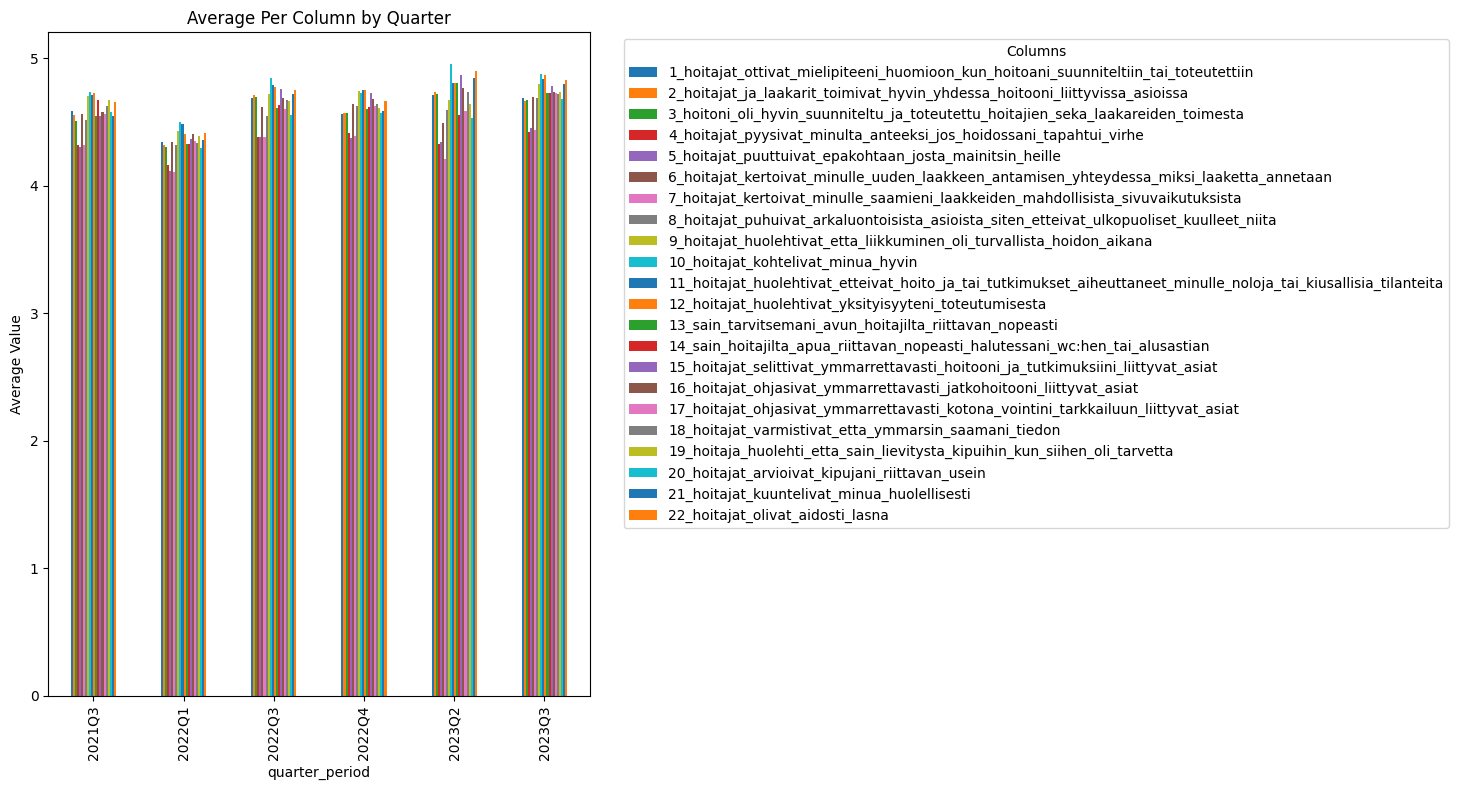

In [17]:
plt.figure(figsize=(15, 8))

# Plot each column as grouped bars
grouped_averages.plot(
    x="quarter_period",  # Quarter on x-axis
    kind="bar",   # Bar chart
    figsize=(15, 8),
    title="Average Per Column by Quarter",
    ylabel="Average Value"
)

# Add legend and adjust layout
plt.legend(title="Columns", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

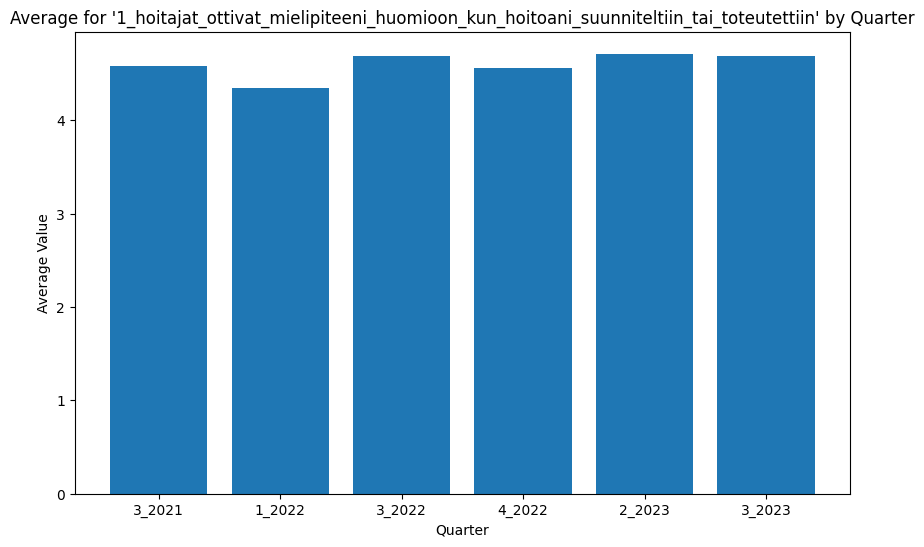

In [19]:
# Example: Plot average for one column
specific_column = "1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin"

plt.figure(figsize=(10, 6))
plt.bar(grouped_averages["quarter"], grouped_averages[specific_column])
plt.title(f"Average for '{specific_column}' by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Average Value")
plt.show()

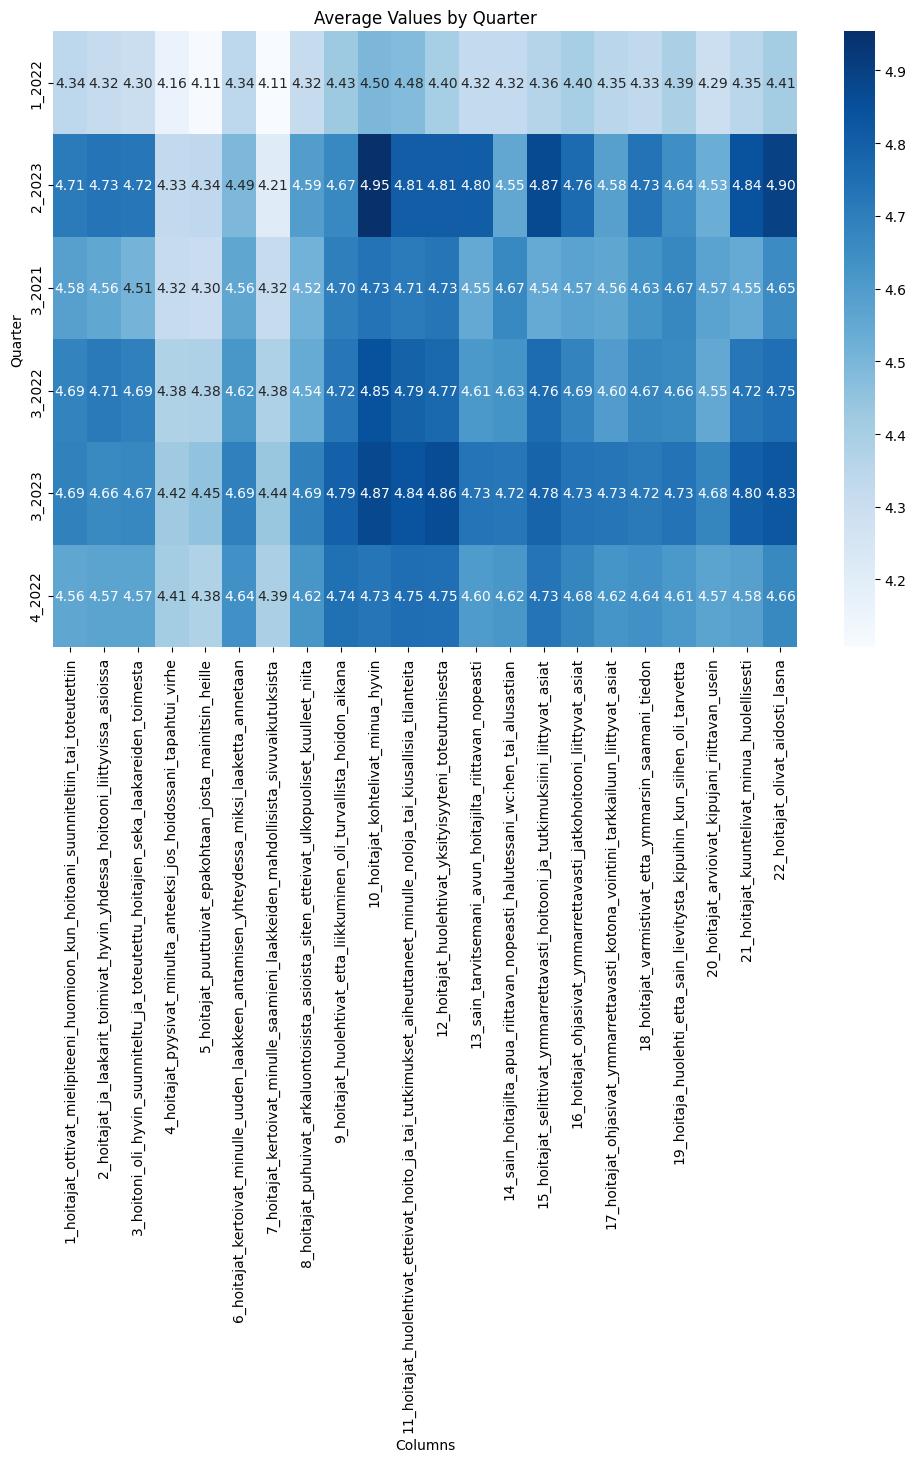

In [ ]:
import seaborn as sns

# Heatmap of averages
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_averages.set_index("quarter_period"), annot=True, cmap="Blues", fmt=".2f")
plt.title("Average Values by Quarter")
plt.ylabel("Quarter")
plt.xlabel("Columns")
plt.show()